In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [103]:
vauxhall = pd.read_csv('/content/drive/MyDrive/Data-Science-project-files/uk used cars/vauxhall.csv')

# Neuer Abschnitt

In [104]:
vauxhall.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4


In [105]:
vauxhall.shape

(13632, 9)

In [106]:
vauxhall.info

<bound method DataFrame.info of          model  year  price transmission  ...  fuelType  tax   mpg  engineSize
0        Corsa  2018   7885       Manual  ...    Petrol  145  55.4         1.4
1        Corsa  2019  11995       Manual  ...    Petrol  145  54.3         1.4
2        Corsa  2017   9777    Automatic  ...    Petrol  145  47.9         1.4
3        Corsa  2016   8500       Manual  ...    Petrol   30  55.4         1.4
4        Corsa  2019  10000       Manual  ...    Petrol  145  43.5         1.4
...        ...   ...    ...          ...  ...       ...  ...   ...         ...
13627    Tigra  2007   2499       Manual  ...    Petrol  165  46.3         1.4
13628   Vectra  2007   1795       Manual  ...    Petrol  240  39.2         1.8
13629   Vectra  2005   1495       Manual  ...    Petrol  235  38.7         1.8
13630   Vectra  2008   1695    Automatic  ...    Diesel  200  39.8         1.9
13631   Vectra  2005   1450       Manual  ...    Petrol  330  27.9         3.2

[13632 rows x 9 col

In [107]:
vauxhall.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [108]:
sum(vauxhall.duplicated())

374

In [109]:
vauxhall.loc[:, vauxhall.isnull().any()].columns
vauxhall2 = vauxhall.drop_duplicates() #drop duplicate arrows

In [110]:
sum(vauxhall2.duplicated())

0

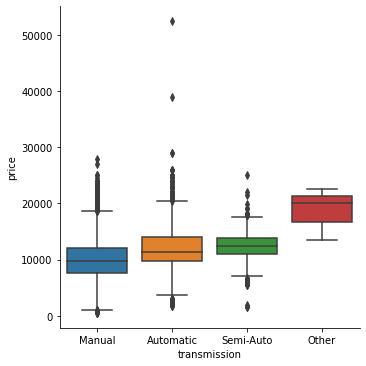

In [111]:
H = sns.catplot(x="transmission", y="price", kind="box", data= vauxhall2) #Transmission (T) Vs Price

In [112]:
print(vauxhall2['transmission'])

0           Manual
1           Manual
2        Automatic
3           Manual
4           Manual
           ...    
13627       Manual
13628       Manual
13629       Manual
13630    Automatic
13631       Manual
Name: transmission, Length: 13258, dtype: object


In [113]:
vauxhall2.loc[:, ['transmission', 'price']]

,transmission,price
0,Manual,7885
1,Manual,11995
2,Automatic,9777
3,Manual,8500
4,Manual,10000
...,...,...
13627,Manual,2499
13628,Manual,1795
13629,Manual,1495
13630,Automatic,1695


In [114]:
AT = vauxhall2.loc[vauxhall2['transmission'] == 'Automatic', ['transmission', 'price']]
MT = vauxhall2.loc[vauxhall2['transmission'] == 'Manual', ['transmission', 'price']]
SA = vauxhall2.loc[vauxhall2['transmission'] == 'Semi-Auto', ['transmission', 'price']]

print(AT.shape)
print(MT.shape)
print(SA.shape)
print(vauxhall2.shape) #calculate how many carsa are 'Other'

(1181, 2)
(11610, 2)
(464, 2)
(13258, 9)


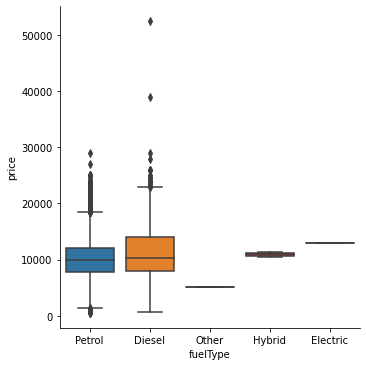

In [115]:
FT = sns.catplot(x="fuelType", y="price", kind="box", data= vauxhall2) #FuelType (T) Vs Price

In [116]:
P = vauxhall2.loc[vauxhall2['fuelType'] == 'Petrol', ['fuelType', 'price']] #Petrol
D = vauxhall2.loc[vauxhall2['fuelType'] == 'Diesel', ['fuelType', 'price']] #Diesel
H = vauxhall2.loc[vauxhall2['fuelType'] == 'Hybrid', ['fuelType', 'price']] #Hybrid
E = vauxhall2.loc[vauxhall2['fuelType'] == 'Electric', ['fuelType', 'price']] #Electric

print(P.shape)
print(D.shape)
print(H.shape)
print(E.shape)

(10488, 2)
(2766, 2)
(2, 2)
(1, 2)


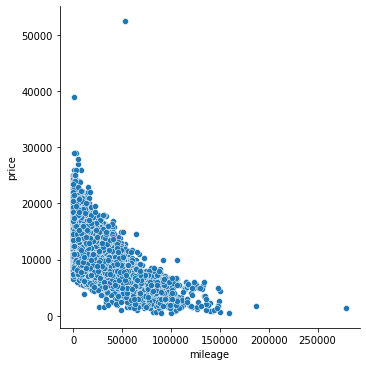

In [117]:
MP =  vauxhall2.loc[:, ['mileage', 'price']]
print(sns.relplot(x="mileage", y="price", data=MP))

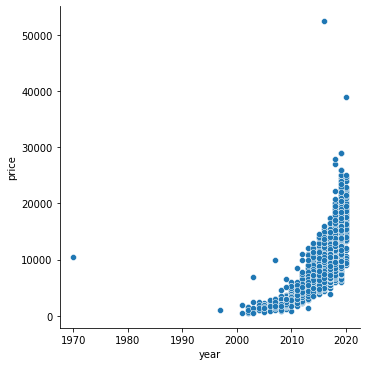

In [118]:
YP =  vauxhall2.loc[:, ['year', 'price']]
print(sns.relplot(x="year", y="price", data=YP))

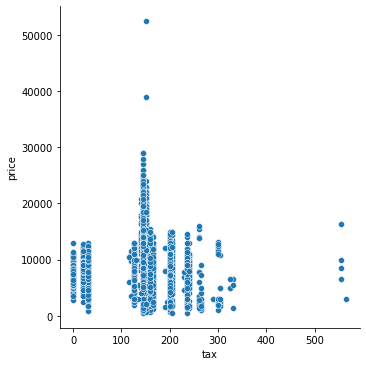

In [119]:
TP =  vauxhall2.loc[:, ['tax', 'price']]
print(sns.relplot(x="tax", y="price", data=TP))

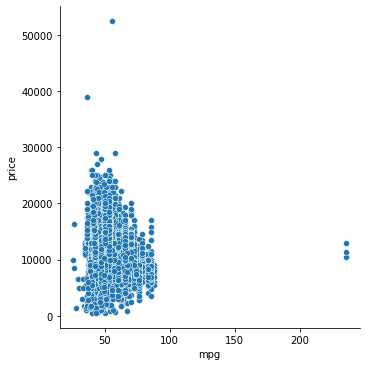

In [120]:
MPP =  vauxhall2.loc[:, ['mpg', 'price']]
print(sns.relplot(x="mpg", y="price", data=MPP))

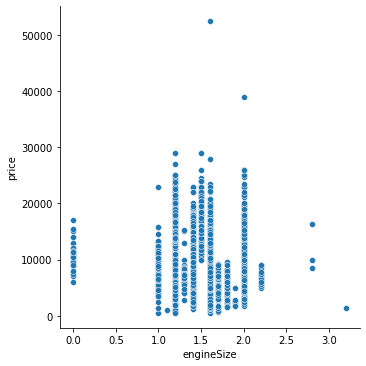

In [121]:
EP =  vauxhall2.loc[:, ['engineSize', 'price']]
print(sns.relplot(x="engineSize", y="price", data=EP))

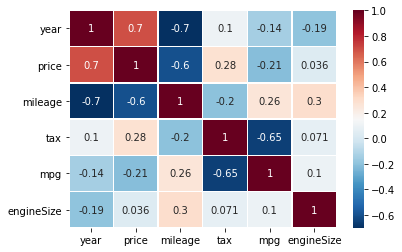

In [122]:
pearsoncorr_hyun = vauxhall2.corr(method='pearson') #-1=negat corr 0=no corr +1=positiv corr
sns.heatmap(pearsoncorr_hyun, 
            xticklabels=pearsoncorr_hyun.columns,
            yticklabels=pearsoncorr_hyun.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Machine Learning Part

In [123]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR         
from sklearn.feature_selection import SelectKBest, f_regression   
from sklearn.ensemble import RandomForestRegressor   
from sklearn.neural_network import MLPRegressor

In [124]:
vauxhall2 = vauxhall2[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']]
vauxhall2.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Corsa,2018,Manual,9876,Petrol,145,55.4,1.4,7885
1,Corsa,2019,Manual,2500,Petrol,145,54.3,1.4,11995
2,Corsa,2017,Automatic,9625,Petrol,145,47.9,1.4,9777
3,Corsa,2016,Manual,25796,Petrol,30,55.4,1.4,8500
4,Corsa,2019,Manual,3887,Petrol,145,43.5,1.4,10000


In [125]:
vauxhall2_dummy = pd.get_dummies(vauxhall2) ###### dummies.. to have more number of CATEGORICAL features .. indexing
vauxhall2_dummy.head()
vauxhall2_dummy.shape

(13258, 37)

In [126]:
vauxhall2_dummy.head()

,year,mileage,tax,mpg,engineSize,price,model_ Adam,model_ Agila,model_ Ampera,model_ Antara,model_ Astra,model_ Cascada,model_ Combo Life,model_ Corsa,model_ Crossland X,model_ GTC,model_ Grandland X,model_ Insignia,model_ Kadjar,model_ Meriva,model_ Mokka,model_ Mokka X,model_ Tigra,model_ Vectra,model_ Viva,model_ Vivaro,model_ Zafira,model_ Zafira Tourer,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2018,9876,145,55.4,1.4,7885,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2019,2500,145,54.3,1.4,11995,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2017,9625,145,47.9,1.4,9777,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,2016,25796,30,55.4,1.4,8500,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,2019,3887,145,43.5,1.4,10000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [127]:
#min_max_scaler = preprocessing.MinMaxScaler()
#vauxhall2_DS1 = min_max_scaler.fit_transform(vauxhall2_dummy.drop(columns= ['price']))
vauxhall2_DS1 =vauxhall2_dummy.drop(columns= ['price'])

In [128]:
vauxhall2_DS2 = pd.DataFrame(vauxhall2_DS1)                                                          
price = vauxhall2['price']        
frames = [vauxhall2_DS2,price]
vauxhall2_DS=pd.concat(frames,axis=1)
print(vauxhall2_DS.head())
print(vauxhall2_DS.shape)

   year  mileage  tax  ...  fuelType_Other  fuelType_Petrol  price
0  2018     9876  145  ...               0                1   7885
1  2019     2500  145  ...               0                1  11995
2  2017     9625  145  ...               0                1   9777
3  2016    25796   30  ...               0                1   8500
4  2019     3887  145  ...               0                1  10000

[5 rows x 37 columns]
(13258, 37)


In [129]:
vauxhall2_DS.replace([np.inf, -np.inf], np.nan, inplace=True)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(vauxhall2_DS.drop(columns = ['price']),
                                                    vauxhall2_DS[['price']],
                                                    test_size = 0.2, random_state = 42)          

In [131]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10606, 36)
(10606, 1)
(2652, 36)
(2652, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

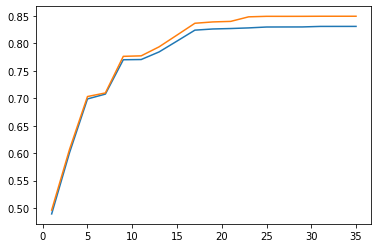

In [132]:

features = vauxhall2_DS.drop(columns = ['price']).columns

N = []                                                                        
r_squared_train = []
r_squared_test = []

for k in range(1, 36, 2):                                                       
    
    selector = SelectKBest(f_regression, k = k)                   
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    LR = LinearRegression()
    LR.fit(X_train_transformed, y_train)
    
    N.append(k)
    r_squared_train.append(LR.score(X_train_transformed, y_train))
    r_squared_test.append(LR.score(X_test_transformed, y_test))
    
sns.lineplot(x = N, y = r_squared_train)
sns.lineplot(x = N, y = r_squared_test)
plt.show()

In [133]:
selector = SelectKBest(f_regression, k = 27)                     
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
features[selector.get_support()]    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Adam',
       'model_ Agila', 'model_ Antara', 'model_ Combo Life', 'model_ Corsa',
       'model_ Crossland X', 'model_ Grandland X', 'model_ Insignia',
       'model_ Kadjar', 'model_ Meriva', 'model_ Mokka', 'model_ Mokka X',
       'model_ Tigra', 'model_ Vectra', 'model_ Viva', 'model_ Vivaro',
       'transmission_Automatic', 'transmission_Manual', 'transmission_Other',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Petrol'],
      dtype='object')

In [134]:
def regression_function(model):
    
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)   
    
    return regressor, score

In [135]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
model_selections = [LinearRegression(),  MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in model_selections:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.848959
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.552227
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.848342
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.184126
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.888932


In [136]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

(10606, 703)


In [137]:
print(len(X_train_transformed), len(y_train))

10606 10606


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

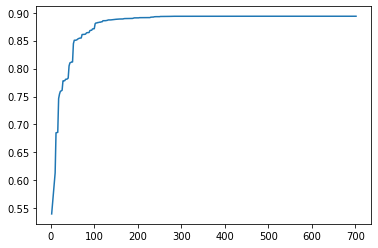

In [138]:
N = []
r_squared = []

for k in range(2, 703, 2): 
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    R = LinearRegression()
    R.fit(X_train_transformed, y_train)
    N.append(k)
    r_squared.append(R.score(X_train_transformed, y_train))
    
sns.lineplot(x = N, y = r_squared)
plt.show()

In [139]:
selector = SelectKBest(f_regression, k =250)

X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

models_used = [LinearRegression(), MLPRegressor(), Ridge(), SVR(), RandomForestRegressor(),]

for model in models_used:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.848959
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.552227
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.848342
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.184126
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.888932
5,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.887386
6,Polynomial,"MLPRegressor(activation='relu', alpha=0.0001, ...",-352131.495851
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.878095
8,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.140455
9,Polynomial,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.899719


In [140]:
model_performance

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.848959
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.552227
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.848342
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.184126
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.888932
5,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.887386
6,Polynomial,"MLPRegressor(activation='relu', alpha=0.0001, ...",-352131.495851
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.878095
8,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.140455
9,Polynomial,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.899719


In [141]:
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)
RF.fit(X_train_transformed_poly, y_train)
y_pred = RF.predict(X_test_transformed_poly)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [142]:
y_test = y_test.reset_index(drop=True)
y_pred_df = pd.DataFrame({'Price_prediction': y_pred.flatten()})

In [143]:
Comparison = y_test.join(y_pred_df) #Comparing the predicted price vs original price by joining them
Comparison.head(100)

,price,Price_prediction
0,12698,12097.348000
1,9495,10368.265000
2,4791,5638.809000
3,12498,13194.680119
4,10544,10747.316000
...,...,...
95,9500,9686.199000
96,7983,7691.047000
97,10657,10506.190000
98,13032,13117.307000


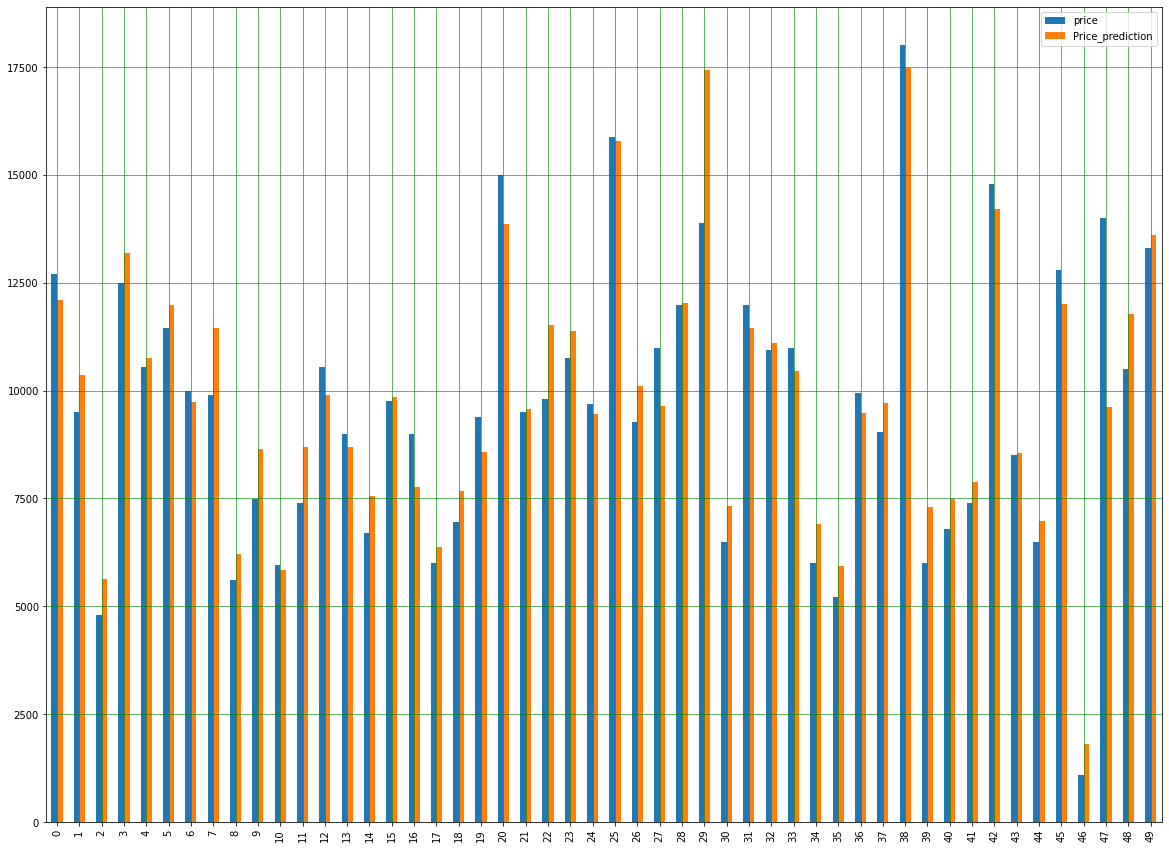

In [144]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'bar', figsize = (20,15))
plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()

XG Boost


In [145]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=15000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [146]:
model.fit(X_train,y_train)

[12:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=15000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [148]:
y_pred=model.predict(X_test)

In [149]:
from sklearn.metrics import r2_score
R_square=r2_score(y_pred,y_test)
print(R_square)

0.9045182029815015


In [ ]:
y_pred_df= pd.DataFrame({'Price_prediction': y_pred})
y_test_df = pd.DataFrame(y_test)
y_test = y_test.reset_index()
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()

In [147]:
print(y_pred)

[12097.348 10368.265  5638.809 ... 10188.509  7991.733  6696.157]
